In [64]:
#Cristian Rivas
'''
Descripción del Conjunto de Datos:
Este dataset contiene información sobre transacciones de ventas al por menor realizadas durante 2023. 
Incluye detalles como la fecha, género del cliente, edad, categoría del producto, cantidad, precio por unidad 
y el monto total de cada transacción.

Fuente: Kaggle
Tamaño: 1000 filas y 8 variables.

Variables:
- Transaction ID: Identificador único de cada transacción.
- Date: Fecha de la transacción.
- Customer ID: Identificador único del cliente.
- Gender: Género del cliente (Male/Female).
- Age: Edad del cliente.
- Product Category: Categoría del producto comprado (Beauty, Clothing, Electronics).
- Quantity: Cantidad de productos comprados.
- Price per Unit: Precio por unidad del producto.
- Total Amount: Monto total de la transacción (Quantity * Price per Unit).
'''

# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos

# Ruta del archivo CSV
archivo_csv = '3_retail_sales_dataset.csv'

# Cargar los datos en un DataFrame
df = pd.read_csv(archivo_csv)

# Mostrar las primeras 10 filas del DataFrame
print("Primeras 10 filas del DataFrame:")
print(df.head(10))


Primeras 10 filas del DataFrame:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2        

In [65]:
# Exploración inicial de los datos

# Mostrar las últimas 5 filas del DataFrame
print("Últimas 5 filas del DataFrame:")
print(df.tail())

# Obtener información general sobre el DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# Generar estadísticas descriptivas
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe())

Últimas 5 filas del DataFrame:
     Transaction ID        Date Customer ID  Gender  Age Product Category  \
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
995         1              50            50  
996         3              30            90  
997         4              25           100  
998         3              50           150  
999         4              30           120  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----

In [66]:
# Limpieza de datos

# Identificar datos faltantes
print("\nDatos faltantes por columna:")
print(df.isnull().sum())

# Corregir tipos de datos (convertir la columna 'Date' a tipo datetime)
print("\nConvirtiendo la columna 'Date' a tipo datetime...")
df['Date'] = pd.to_datetime(df['Date'])

# Verificar si hay duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

# Si hay duplicados, eliminarlos
if duplicados > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados.")


Datos faltantes por columna:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Convirtiendo la columna 'Date' a tipo datetime...

Número de filas duplicadas: 0



Columnas eliminadas. Columnas actuales del dataset:
Index(['Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')


<Figure size 1400x500 with 0 Axes>

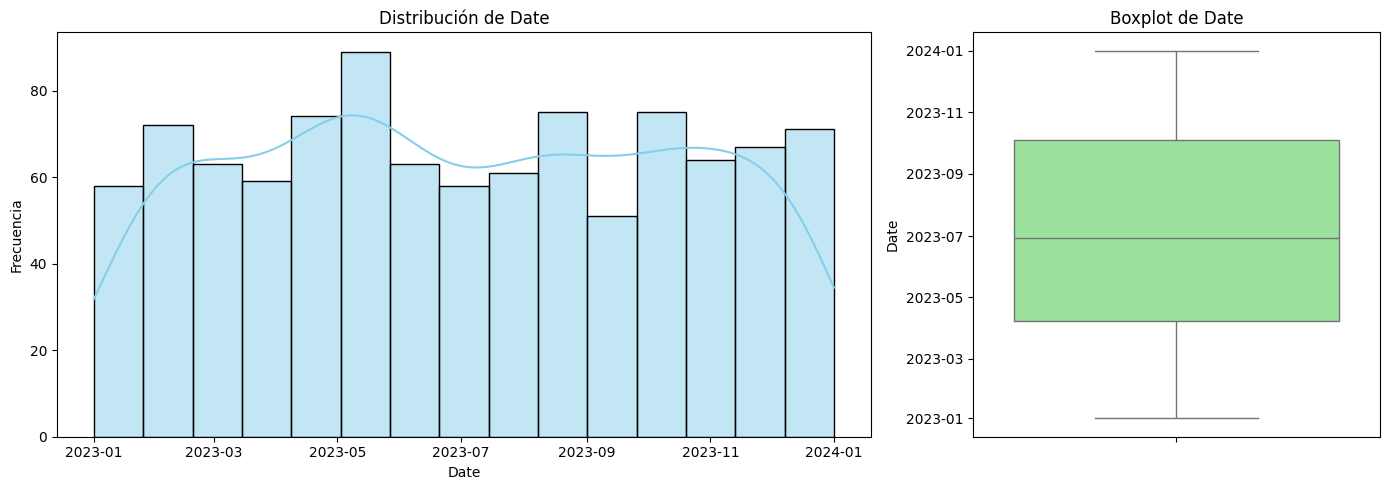

C:\Users\HP\AppData\Local\Temp\ipykernel_16908\1428816404.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=axes[0])


<Figure size 1400x500 with 0 Axes>

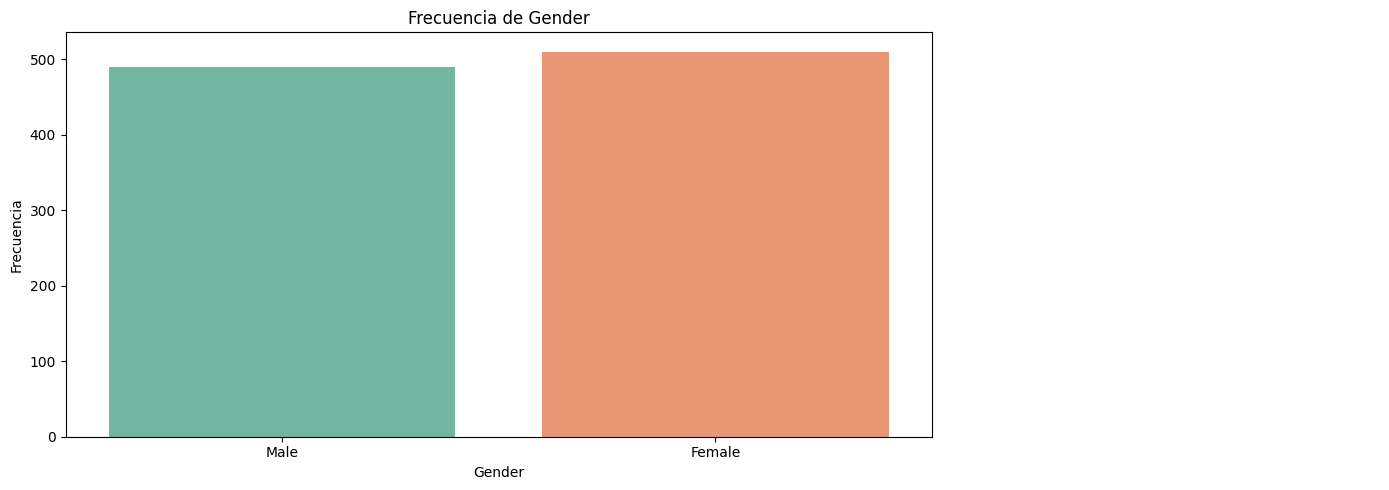

<Figure size 1400x500 with 0 Axes>

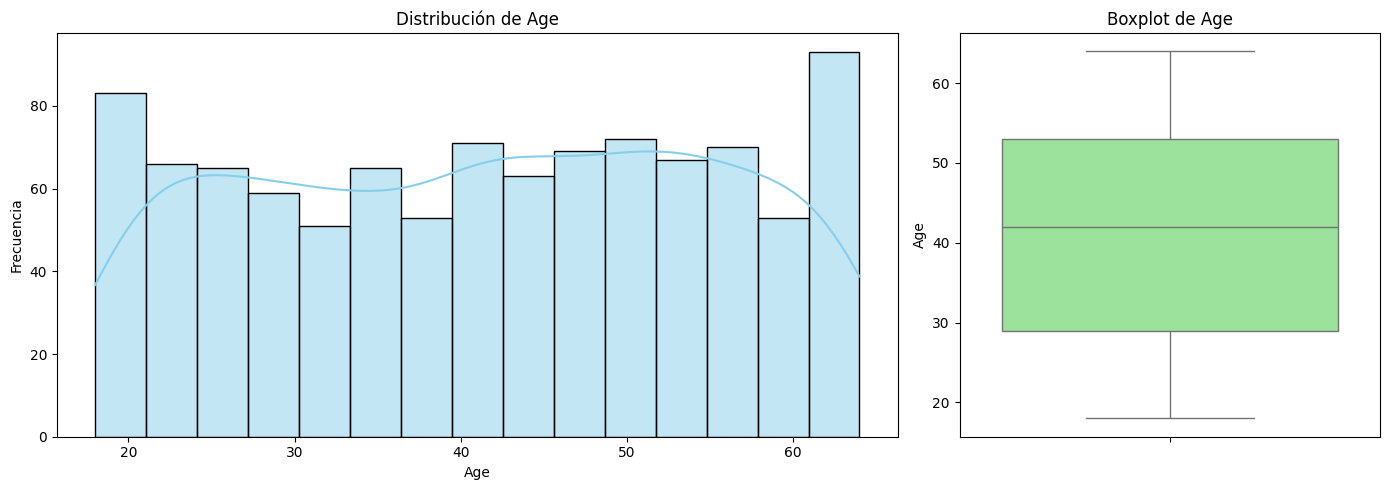

C:\Users\HP\AppData\Local\Temp\ipykernel_16908\1428816404.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=axes[0])


<Figure size 1400x500 with 0 Axes>

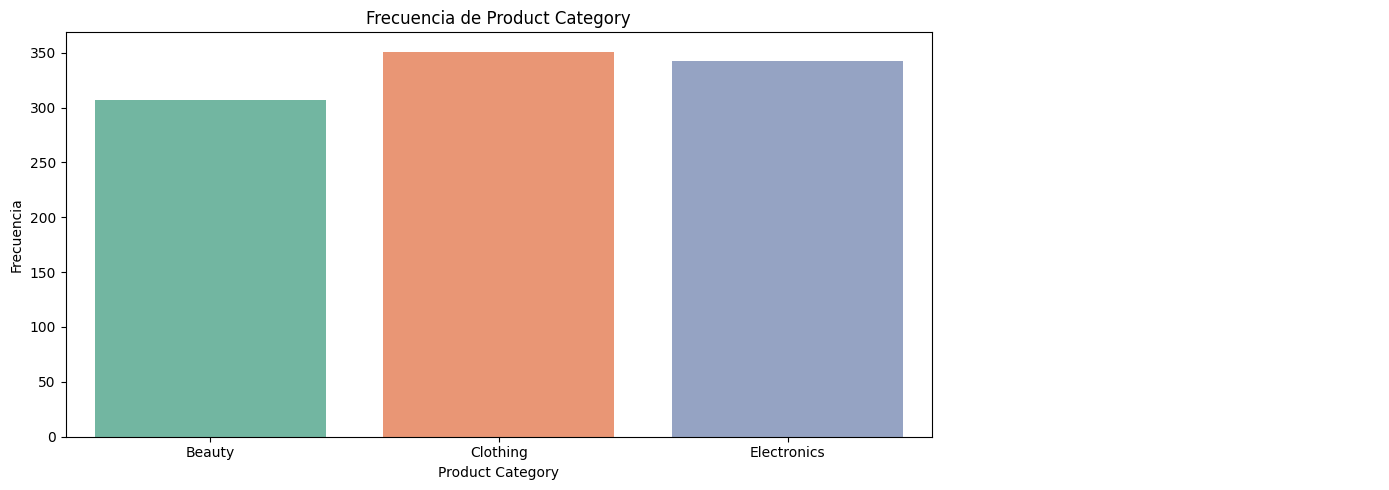

<Figure size 1400x500 with 0 Axes>

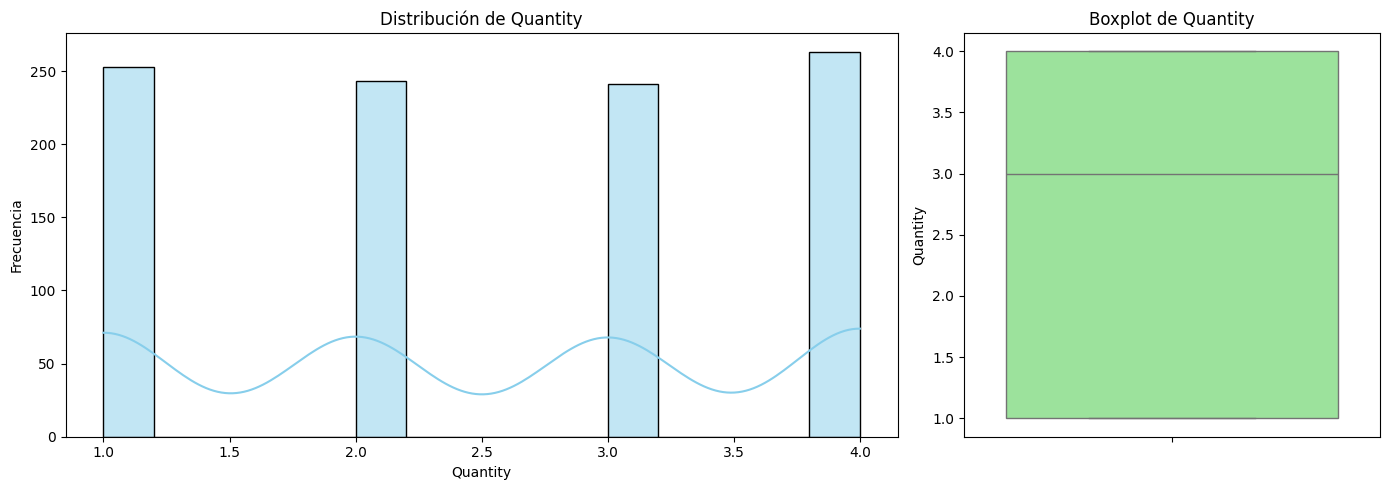

<Figure size 1400x500 with 0 Axes>

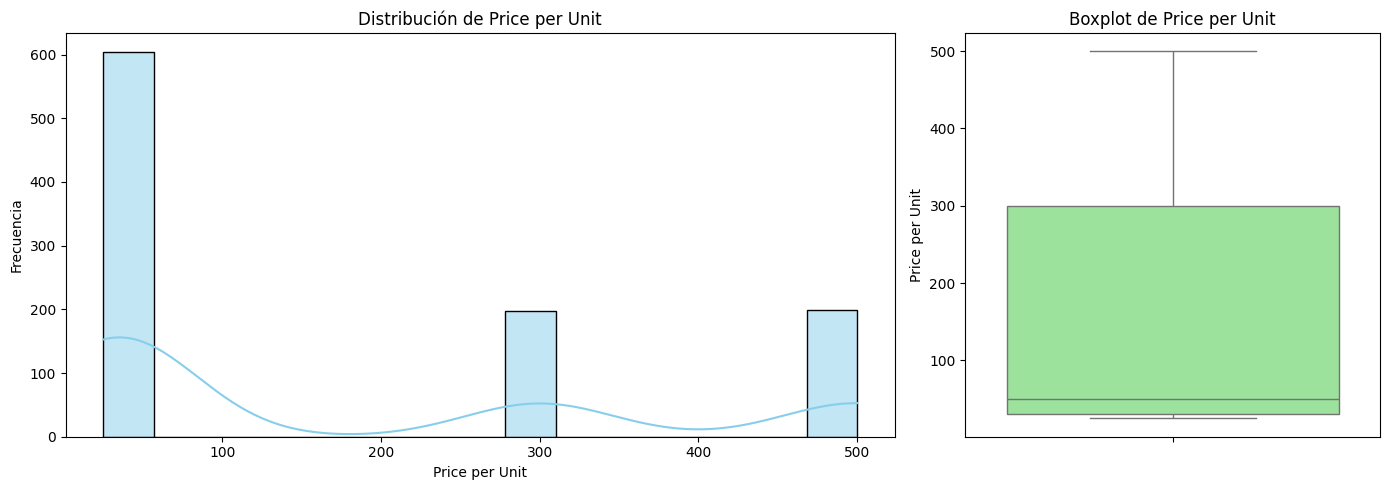

<Figure size 1400x500 with 0 Axes>

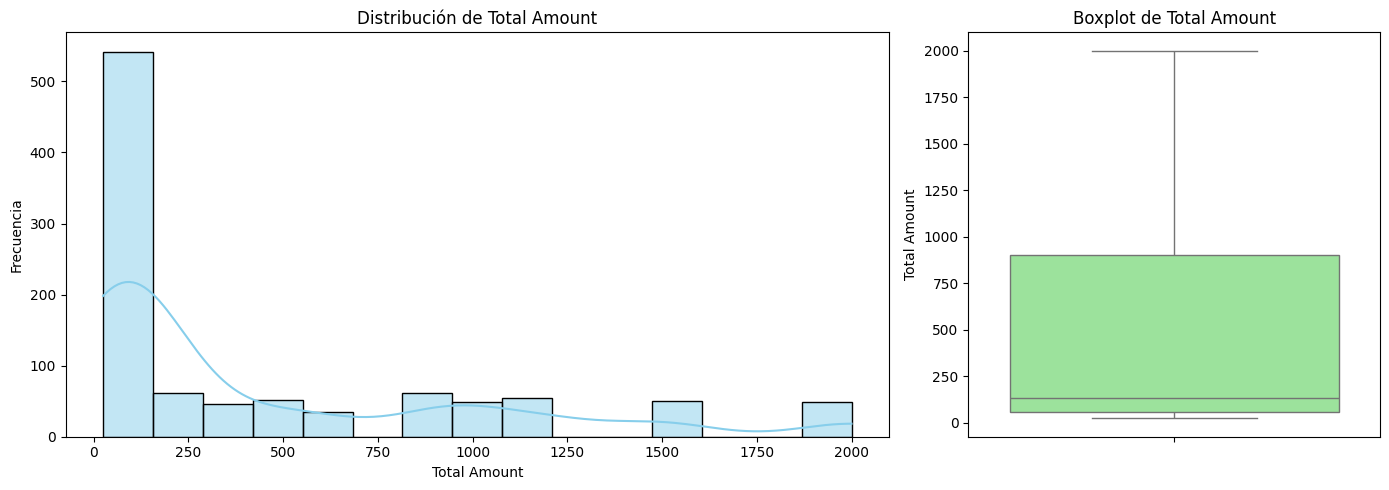

In [67]:

# Paso 1: Eliminar las columnas 'Customer ID' y 'Transaction ID'
df = df.drop(columns=['Customer ID', 'Transaction ID'])
print("\nColumnas eliminadas. Columnas actuales del dataset:")
print(df.columns)

# Paso 2: Visualizar cada variable con gráficos
for col in df.columns:
    plt.figure(figsize=(14, 5))  # Crear una figura con 2 gráficos
    
    # Configuración de dos gráficos: principal y boxplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [2, 1]})
    
    # Si la columna es categórica
    if df[col].dtype == 'object':
        # Gráfico de barras
        sns.countplot(x=col, data=df, palette='Set2', ax=axes[0])
        axes[0].set_title(f'Frecuencia de {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot no aplicable a categóricas
        axes[1].axis('off')
    
    # Si la columna es numérica
    else:
        # Histograma
        sns.histplot(df[col], kde=True, bins=15, color='skyblue', ax=axes[0])
        axes[0].set_title(f'Distribución de {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot
        sns.boxplot(y=col, data=df, color='lightgreen', ax=axes[1])
        axes[1].set_title(f'Boxplot de {col}')
        axes[1].set_ylabel(col)
        axes[1].set_xlabel('')
    
    # Ajustar diseño
    plt.tight_layout()
    plt.show()


Este dataset no tiene outliers

In [68]:
# Crear la columna Year_Decimal para poder usar la fecha en el mapa de calor más adelante
def fecha_año_decimal(fecha):
    # Año actual
    año = fecha.year
    
    # Días transcurridos en el año
    días_transcurridos = (fecha - pd.Timestamp(f'{año}-01-01')).days
    
    # Total de días en el año (para años bisiestos y no bisiestos)
    días_totales = (pd.Timestamp(f'{año + 1}-01-01') - pd.Timestamp(f'{año}-01-01')).days
    
    # Año con decimales
    año_decimal = año + días_transcurridos / días_totales
    return año_decimal

# Aplicar la transformación a la columna 'Date'
df['Year_Decimal'] = df['Date'].apply(fecha_año_decimal)

# Verificar las primeras filas con la nueva columna
print("Primeras filas con la columna 'Year_Decimal':")
print(df[['Date', 'Year_Decimal']].head(10))

# Imprimir las primeras 10 filas del DataFrame
print("\n", "Primeras 10 filas del DataFrame:")
print(df.head(10))


Primeras filas con la columna 'Year_Decimal':
        Date  Year_Decimal
0 2023-11-24   2023.895890
1 2023-02-27   2023.156164
2 2023-01-13   2023.032877
3 2023-05-21   2023.383562
4 2023-05-06   2023.342466
5 2023-04-25   2023.312329
6 2023-03-13   2023.194521
7 2023-02-22   2023.142466
8 2023-12-13   2023.947945
9 2023-10-07   2023.764384

 Primeras 10 filas del DataFrame:
        Date  Gender  Age Product Category  Quantity  Price per Unit  \
0 2023-11-24    Male   34           Beauty         3              50   
1 2023-02-27  Female   26         Clothing         2             500   
2 2023-01-13    Male   50      Electronics         1              30   
3 2023-05-21    Male   37         Clothing         1             500   
4 2023-05-06    Male   30           Beauty         2              50   
5 2023-04-25  Female   45           Beauty         1              30   
6 2023-03-13    Male   46         Clothing         2              25   
7 2023-02-22    Male   30      Electronics    

In [69]:
# Codificar la variable Gender
df['Is_Female'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Eliminar la columna original Gender
df = df.drop(columns=['Gender'])

# Realizar One-Hot Encoding para Product Category
df = pd.get_dummies(df, columns=['Product Category'], prefix='Category', drop_first=False)

# Verificar las primeras filas del DataFrame actualizado
print("Primeras filas del DataFrame con las columnas codificadas:")
print(df.head(10))




Primeras filas del DataFrame con las columnas codificadas:
        Date  Age  Quantity  Price per Unit  Total Amount  Year_Decimal  \
0 2023-11-24   34         3              50           150   2023.895890   
1 2023-02-27   26         2             500          1000   2023.156164   
2 2023-01-13   50         1              30            30   2023.032877   
3 2023-05-21   37         1             500           500   2023.383562   
4 2023-05-06   30         2              50           100   2023.342466   
5 2023-04-25   45         1              30            30   2023.312329   
6 2023-03-13   46         2              25            50   2023.194521   
7 2023-02-22   30         4              25           100   2023.142466   
8 2023-12-13   63         2             300           600   2023.947945   
9 2023-10-07   52         4              50           200   2023.764384   

   Is_Female  Category_Beauty  Category_Clothing  Category_Electronics  
0          0             True             

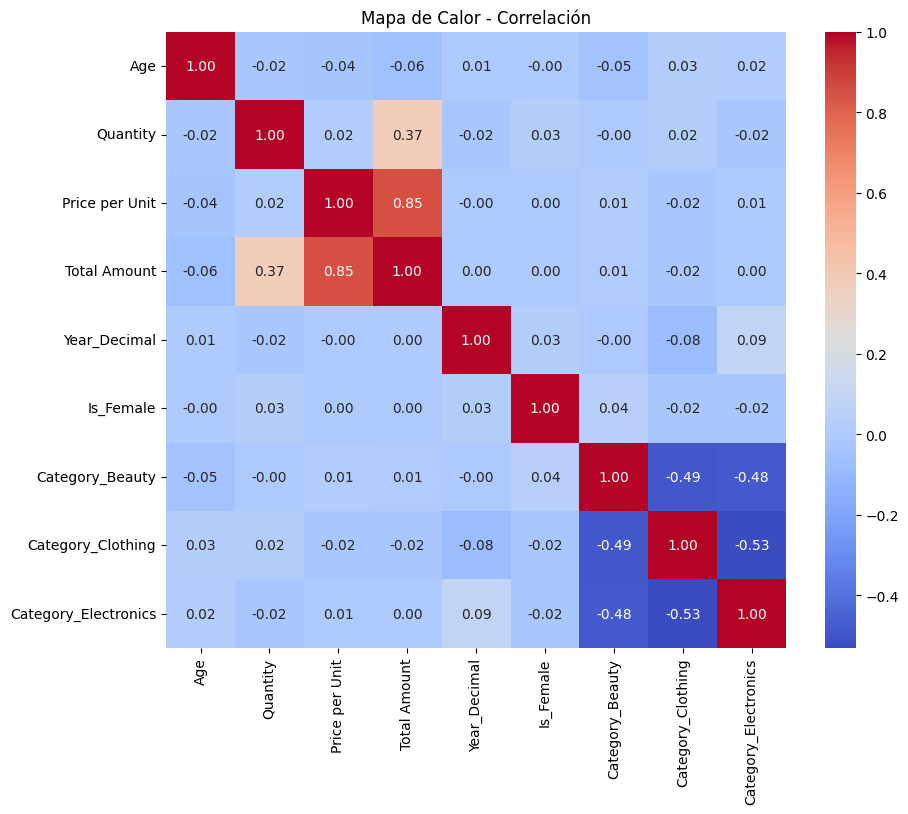

In [70]:

# Paso 1: Escalar las variables
scaler = StandardScaler()
variables_a_escalar = ['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Year_Decimal']
df[variables_a_escalar] = scaler.fit_transform(df[variables_a_escalar])

# Paso 2: Crear el mapa de calor con las variables seleccionadas
variables_para_mapa = ['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Year_Decimal',
                       'Is_Female', 'Category_Beauty', 'Category_Clothing', 'Category_Electronics']

# Generar la matriz de correlación
correlacion = df[variables_para_mapa].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor - Correlación')
plt.show()


El análisis exploratorio del dataset revela que las transacciones están distribuidas uniformemente a lo largo del año, con un ligero pico en mayo. La distribución por género es equilibrada, mientras que las categorías de productos muestran una preferencia similar entre Beauty, Clothing y Electronics. En las variables numéricas, se observa que Total Amount tiene una fuerte correlación positiva con Price per Unit (0.85) y una moderada con Quantity (0.37), indicando que estas variables contribuyen significativamente a las ventas. El boxplot de Price per Unit revela precios agrupados en niveles, y el de Total Amount muestra una dispersión considerable, reflejando transacciones de diferentes valores. El reto principal es la falta de correlaciones significativas entre Is_Female o las categorías de productos con otras variables, lo que podría indicar que las preferencias de compra no dependen directamente del género o categoría y requieren un análisis más complejo, como clustering o segmentación avanzada.